# 問題１

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in exp
  # This is added back by InteractiveShellApp.init_path()


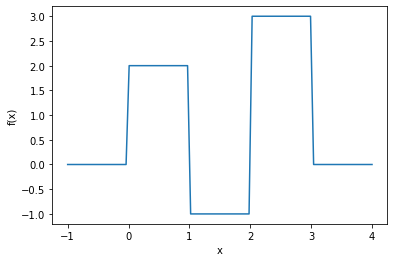

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

v = np.array([2, -2, -1, 1, 3, -3])
b = np.array([0, -1000, -1000, -2000, -2000, -3000])


def g(x):
  a = 0
  for i in range(len(v)):
    a +=v[i]/(1 + np.exp(-1000 * x - b[i]))
  return a

x = np.linspace(-1,4,100)
y = g(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x,y)

# 問題2

In [ ]:
import torch
import torch.nn as nn

dtype = torch.float

x = torch.tensor([[0], [0]], dtype=dtype)
w = torch.tensor([[1, 1], [-1, -1]], dtype=dtype)
q = torch.tensor([[1], [1]], dtype=dtype)
b = torch.tensor([[-0.5], [1.5]], dtype=dtype)
c = -1.5

model = nn.Sequential(
    nn.Linear(2,2,bias = True),
    nn.ReLU(),
    nn.Linear(2,1,bias = True),
    nn.Sigmoid(),
)

eta = 0.5
for t in range(1000):
  y_pred = model(x)
  

